## I confirm that this is my own work, except where clearly indicated.

### Importing packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math

### Reading the data in, and splitting into training and testing sets

In [2]:
input_data = pd.read_csv("train.csv")

In [3]:
input_data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [4]:
# Drop ID 
input_data = input_data.drop("id", axis=1)

In [5]:
input_data["target"].unique()

array([0, 1])

In [6]:
Y = input_data["target"]
X = input_data.iloc[:,1:]

In [7]:
X.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
list_of_issues = []
for i in X.columns:
    if "cat" in i:
        X[i] = pd.Categorical(X[i])
    
    if -1 in X[i].unique():
        list_of_issues.append(i)

In [9]:
X.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [10]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
595207    0
595208    0
595209    0
595210    0
595211    0
Name: target, Length: 595212, dtype: int64

In [11]:
list_of_missing = []
for col in X.columns:
    total = X[X[col] == -1].count()
    if total[0] > 0: 
        list_of_missing.append((col, total[0]/len(X)))

In [12]:
list_of_missing.sort(key = lambda x: x[1]) 

In [13]:
list_of_missing

[('ps_car_12', 1.68007365442901e-06),
 ('ps_car_02_cat', 8.400368272145051e-06),
 ('ps_car_11', 8.400368272145051e-06),
 ('ps_ind_04_cat', 0.00013944611331760784),
 ('ps_car_01_cat', 0.0001797678810239041),
 ('ps_ind_02_cat', 0.0003628959093566662),
 ('ps_car_09_cat', 0.0009559619093701067),
 ('ps_ind_05_cat', 0.00975954785857812),
 ('ps_car_07_cat', 0.019302366215734897),
 ('ps_car_14', 0.07160473915176441),
 ('ps_reg_03', 0.18106489788512328),
 ('ps_car_05_cat', 0.4478253126617071),
 ('ps_car_03_cat', 0.6908983689844963)]

In [14]:
# remove 3 highest columns, replace the rest with the mean for non categorical data 
# and the mode for categorical data 
X = X.drop(["ps_car_03_cat","ps_car_05_cat", "ps_reg_03"], axis=1)

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
for i in list_of_missing[0:-3]:
    name = i[0]
    if "cat" in name:
        imp = SimpleImputer(missing_values=-1, strategy='median')
    else:
        imp = SimpleImputer(missing_values=-1, strategy='mean')
        
    X[name] = imp.fit_transform(X[[name]])


In [17]:
X

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1.0,7,0.0,0.0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4.0,9,1.0,0.0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1.0,2,0.0,0.0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2.0,0,1.0,0.0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1.0,10,0.0,0.0,0,0,0,1,0,...,4,1,9,6,0,1,1,0,1,1
595208,5,1.0,3,0.0,0.0,0,0,0,1,0,...,4,1,3,8,1,0,1,0,1,1
595209,1,1.0,10,0.0,0.0,1,0,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,5,2.0,3,1.0,0.0,0,0,1,0,0,...,4,1,4,2,0,1,1,1,0,0


In [18]:
mask = np.column_stack([X[col] == -1 for col in X])
X.loc[mask.any(axis=1)]

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin


In [19]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, stratify=Y, test_size=0.30, random_state=42)

## Perform Feature Selection

#### Using Extra Trees

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [21]:
clf = ExtraTreesClassifier(n_estimators=50)

In [22]:
clf = clf.fit(X_Train, Y_Train)
clf.feature_importances_  

array([0.02758907, 0.01782494, 0.03184293, 0.01313473, 0.0124363 ,
       0.00307357, 0.0037084 , 0.00402332, 0.00386402, 0.00013352,
       0.00035963, 0.00148436, 0.00032027, 0.00159192, 0.03051634,
       0.00642795, 0.00322447, 0.00561731, 0.026326  , 0.03048634,
       0.02655864, 0.00520066, 0.01125501, 0.02700106, 0.00505086,
       0.00741115, 0.01953966, 0.00213835, 0.02816183, 0.01911245,
       0.02593506, 0.03252427, 0.03111678, 0.02718897, 0.0301759 ,
       0.03012417, 0.03036448, 0.02855271, 0.02867226, 0.02914761,
       0.02987439, 0.02999769, 0.02895808, 0.03185016, 0.03164963,
       0.02846375, 0.03055401, 0.03160761, 0.01090254, 0.01666604,
       0.01683849, 0.01541198, 0.01570388, 0.0123045 ])

In [23]:
forest = clf

Feature ranking:
1. feature 31 (0.032524)
2. feature 43 (0.031850)
3. feature 2 (0.031843)
4. feature 44 (0.031650)
5. feature 47 (0.031608)
6. feature 32 (0.031117)
7. feature 46 (0.030554)
8. feature 14 (0.030516)
9. feature 19 (0.030486)
10. feature 36 (0.030364)
11. feature 34 (0.030176)
12. feature 35 (0.030124)
13. feature 41 (0.029998)
14. feature 40 (0.029874)
15. feature 39 (0.029148)
16. feature 42 (0.028958)
17. feature 38 (0.028672)
18. feature 37 (0.028553)
19. feature 45 (0.028464)
20. feature 28 (0.028162)
21. feature 0 (0.027589)
22. feature 33 (0.027189)
23. feature 23 (0.027001)
24. feature 20 (0.026559)
25. feature 18 (0.026326)
26. feature 30 (0.025935)
27. feature 26 (0.019540)
28. feature 29 (0.019112)
29. feature 1 (0.017825)
30. feature 50 (0.016838)
31. feature 49 (0.016666)
32. feature 52 (0.015704)
33. feature 51 (0.015412)
34. feature 3 (0.013135)
35. feature 4 (0.012436)
36. feature 53 (0.012304)
37. feature 22 (0.011255)
38. feature 48 (0.010903)
39. featu

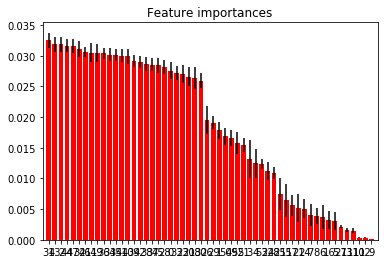

In [24]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_Train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_Train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_Train.shape[1]), indices)
plt.xlim([-1, X_Train.shape[1]])
plt.show()

In [25]:
np.mean(importances)

0.01851851851851852

In [26]:
model = SelectFromModel(clf, prefit=True)

In [27]:
X_new = model.transform(X_Train)
X_new.shape    

(416648, 28)

In [28]:
X_new

array([[1, 7, 7, ..., 3, 3, 7],
       [5, 3, 7, ..., 3, 3, 7],
       [3, 7, 11, ..., 4, 2, 7],
       ...,
       [1, 2, 8, ..., 0, 0, 6],
       [3, 3, 7, ..., 0, 2, 9],
       [2, 7, 6, ..., 0, 2, 14]], dtype=object)

In [29]:
X_test_new = model.transform(X_Test)

# Classification

In [65]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_new, Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

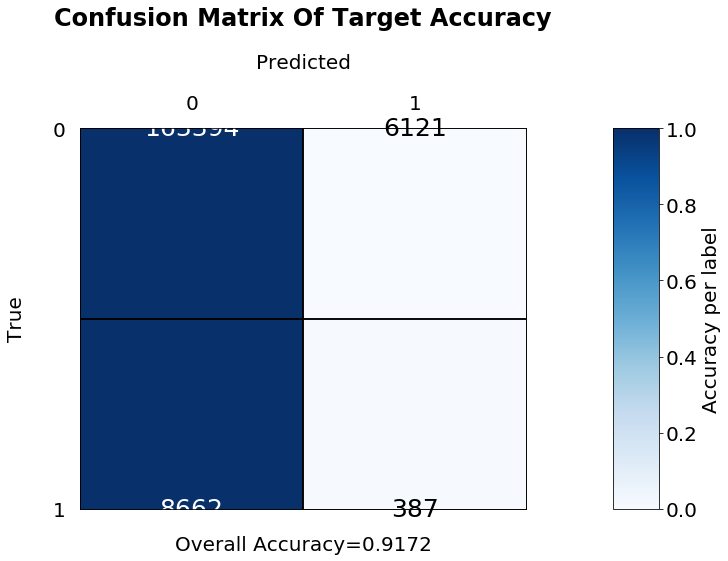

In [68]:
Y_Pred = clf.predict(X_test_new)
make_confusion_matrix(Y_Pred, Y_Test)

In [ ]:
enc = OneHotEncoder()
new_X = enc.fit_transform(X)
from sklearn.preprocessing import OneHotEncoder

In [30]:
from sklearn import tree 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from plotml import * 

In [44]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
K = 5
scores = cross_val_score(clf, X_Train, Y_Train, cv=K)
scores

In [45]:
Y_Pred = clf.predict(X_Test)

In [31]:
def make_confusion_matrix(Y_Test, Y_Pred, title="Confusion Matrix Of Target Accuracy"):
    cm = confusion_matrix(Y_Test, Y_Pred)
    plot_confusion_matrix(cm, labels=[0,1], title=title, cmap=plt.cm.Blues)

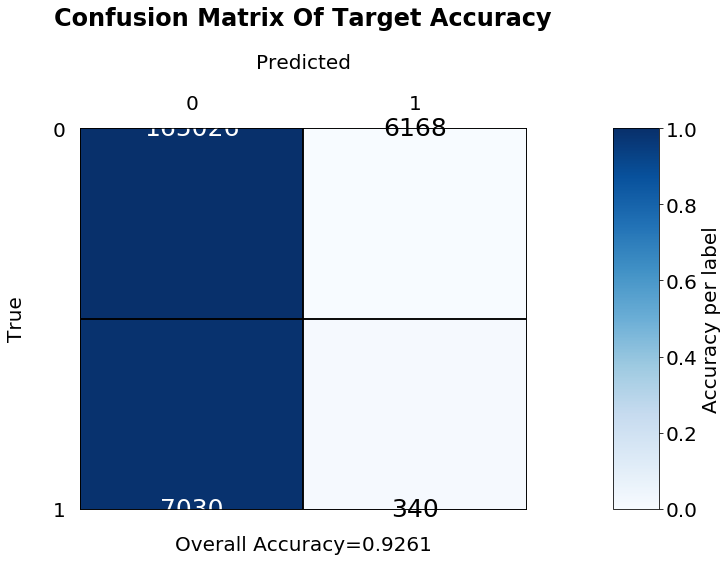

In [47]:
make_confusion_matrix(Y_Pred, Y_Test)

from sklearn.tree import export_graphviz 
from graphviz import Source 
treeviz = export_graphviz(clf,
                            feature_names=X_Train.columns, 
                            class_names=["0","1"])

Source(treeviz)

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
forest = RandomForestClassifier()

In [103]:
forest.fit(X_new, Y_Train)

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
pred = forest.predict(X_test_new)

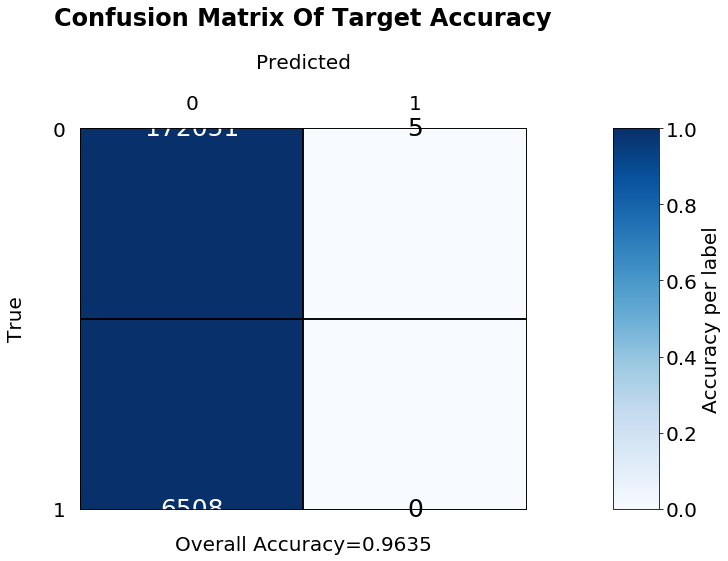

In [106]:
make_confusion_matrix(Y_Test, pred)

In [108]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression()
regr.fit(X_new, Y_Train)

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
K = 5
scores = cross_val_score(regr, X_new, Y_Train, cv=K)
scores

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linea

array([0.96354298, 0.96355454, 0.9635541 , 0.9635541 , 0.9635541 ])

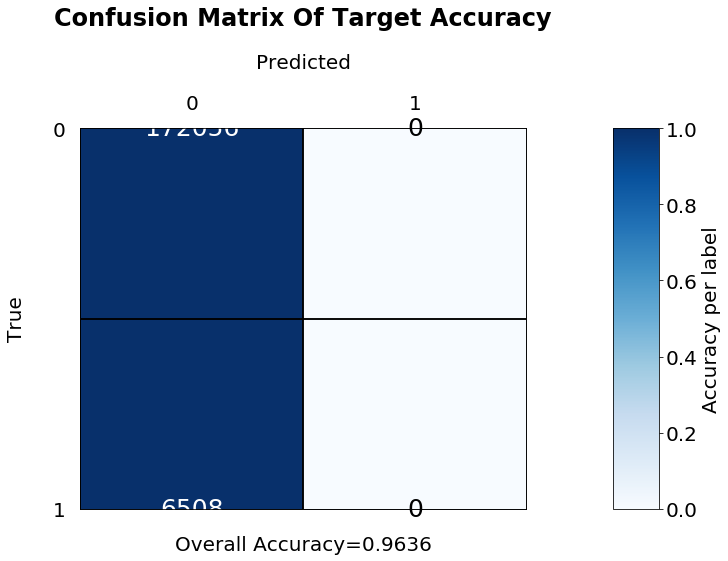

In [109]:
pred_regr = regr.predict(X_test_new)
make_confusion_matrix(Y_Test, pred_regr)

In [33]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.fit(X_new, Y_Train)

pred_svm = svm.predict(X_test_new)
make_confusion_matrix(Y_Test, pred_svm)

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
svm